In [143]:
import symbolic
import torch
# state = torch.load('/Users/sofiadunlosky/Documents/models/CW/experiments/models/rn_lbc',map_location='cpu')

In [144]:
from symbolic import RN

In [136]:
import numpy as np
#data=np.load('/Users/sofiadunlosky/Downloads/lbc_test_with_labels.npz')

In [137]:
# import get_function_name_as_string
# get_function_name_as_string(data['relations'][0])
#a1=np.zeros((len(data['relations']),1)).tolist()
#for i in range (0,len(data['relations'])):
#    a1[i]=data['relations'][i].__name__
#         a1[i]=1
#     if data['relations'][i].__name__=='amax':
#         a1[i]=2
#     if data['relations'][i].__name__=='amin':
#         a1[i]=3
#     if data['relations'][i].__name__=='argmax':
#         a1[i]=4
#     if data['relations'][i].__name__=='argmin':
#         a1[i]=5
    


In [127]:
#inputs=data['arr']

In [128]:
# rn=RN()
# rn.load_state_dict(torch.load('models/rn_'+'lbc', map_location='cpu'))
# inputs = torch.tensor(inputs, dtype=torch.float, requires_grad=True)
# a=rn(inputs)

In [167]:
# from matplotlib.pyplot import scatter
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA
# def plot_pca_data(a,a1,name):
#     pca = PCA()
#     pca.fit(a.detach().numpy())
#     b=pca.transform(a.detach().numpy())
#     k=np.unique(a1)
#     a2=np.array(a1).reshape(-1,1)
#     for i in range (0,k.size):
#         scatter(b[:,0][np.where(a2==k[i])[0][0:3000]],b[:,1][np.where(a2==k[i])[0][0:3000]],label=k[i])
#     plt.legend()
#     plt.xlabel('component_0')
#     plt.ylabel('component_1')
#     plt.title(name+' pca')
#     plt.show()

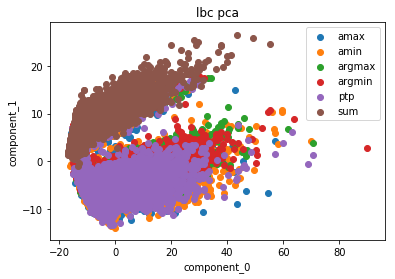

In [129]:
# plot_pca_data(a[:,3,:],a1,'lbc')

In [66]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(a[:,3,:].detach().numpy())
# b=pca.transform(a[:,3,:].detach().numpy())

In [138]:
# np.save('data_lbc.npy',b)
# np.save('label_lbc.npy',a1)

In [107]:
# import os
# models=os.listdir('/Users/sofiadunlosky/Documents/models/CW/experiments/models/')
# for i in range (0,len(models)):
# state = torch.load('/Users/sofiadunlosky/Documents/models/CW/experiments/models/'+models[i],map_location='cpu')

In [139]:
#state = torch.load('/Users/sofiadunlosky/Documents/models/CW/experiments/models/rn_mixed',map_location='cpu')
data=np.load('/Users/sofiadunlosky/Downloads/mixed_test_with_labels.npz')

In [140]:
inputs=data['arr']
rn=RN()
rn.load_state_dict(torch.load('models/rn_'+'mixed', map_location='cpu'))
inputs = torch.tensor(inputs, dtype=torch.float, requires_grad=True)
a=rn(inputs)


In [141]:
a1=np.zeros((len(data['relations']),1)).tolist()
for i in range (0,len(data['relations'])):
    a1[i]=data['relations'][i].__name__

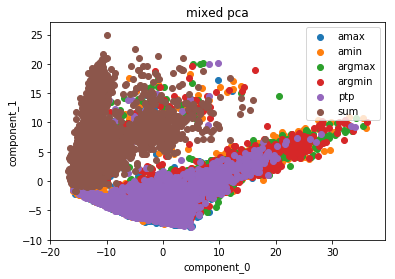

In [122]:
plot_pca_data(a[:,3,:],a1,'mixed')

In [142]:
# pca = PCA()
# pca.fit(a[:,3,:].detach().numpy())
# b=pca.transform(a[:,3,:].detach().numpy())
# np.save('data_mixed.npy',b)
# np.save('label_mixed.npy',a1)

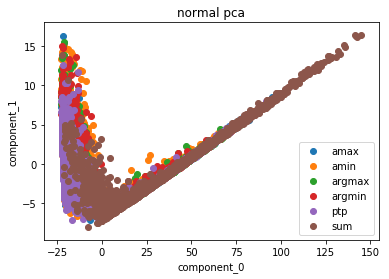

In [168]:
#normal model lbc data
import numpy as np
data=np.load('/Users/sofiadunlosky/Downloads/lbc_test_with_labels.npz')
inputs=data['arr']
rn=RN()
rn.load_state_dict(torch.load('models/rn_'+'random', map_location='cpu'))
inputs = torch.tensor(inputs, dtype=torch.float, requires_grad=True)
a=rn(inputs)
a1=np.zeros((len(data['relations']),1)).tolist()
for i in range (0,len(data['relations'])):
    a1[i]=data['relations'][i].__name__
plot_pca_data(a[:,3,:],a1,'normal')

In [147]:
# pca = PCA()
# pca.fit(a[:,3,:].detach().numpy())
# b=pca.transform(a[:,3,:].detach().numpy())
# np.save('data_normal.npy',b)
# np.save('label_normal.npy',a1)

In [192]:
aa=np.hstack((np.where(a1==k[0])[0][0:3000],np.where(a1==k[1])[0][0:3000]))
k=np.unique(a1)
for i in range (2,k.size):
    aa=np.hstack((aa,np.where(a1==k[i])[0][0:3000]))

In [204]:
a[aa,:].shape

(18000, 128)

In [209]:
b=pca.transform(a[aa,:])
b.shape

(18000, 128)

In [217]:
np.where(a2==k[0])[0][0:3000]

array([    3,     6,    14, ..., 18020, 18021, 18036])

In [218]:
b[aa[0:3000],0]

IndexError: index 18000 is out of bounds for axis 0 with size 18000

In [219]:
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
def plot_pca_data(a,a1,name,N=3000):
    k=np.unique(a1)
    aa=np.hstack((np.where(a1==k[0])[0][0:N],np.where(a1==k[1])[0][0:N]))
    for i in range (2,k.size):
        aa=np.hstack((aa,np.where(a1==k[i])[0][0:N]))
    pca = PCA()
    pca.fit(a[aa,:])
    b=pca.transform(a[aa,:])
    #k=np.unique(a1)
    a2=np.array(a1).reshape(-1,1)
    for i in range (0,k.size):
        scatter(b[i*N:i*N+N,0],b[i*N:i*N+N,1],label=k[i])
    plt.legend()
    plt.xlabel('component_0')
    plt.ylabel('component_1')
    plt.title(name+' pca')
    plt.show()

In [223]:
from matplotlib.pyplot import scatter
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
def plot_tsne_data(d,a1,name,N):
    k=np.unique(a1)
    aa=np.hstack((np.where(a1==k[0])[0][0:N],np.where(a1==k[1])[0][0:N]))
    for i in range (2,k.size):
        aa=np.hstack((aa,np.where(a1==k[i])[0][0:N]))
    tsne = TSNE(n_components=2)
    tsne.fit(a[aa,:])
    b=tsne.fit_transform(a[aa,:])
    k=np.unique(a1)
    a2=np.array(a1).reshape(-1,1)
    for i in range (0,k.size):
        scatter(b[i*N:i*N+N,0],b[i*N:i*N+N,1],label=k[i])
        #scatter(b[:,0][np.where(a2==k[i])[0][0:3000]],b[:,1][np.where(a2==k[i])[0][0:3000]],label=k[i])
    plt.legend()
    plt.xlabel('component_0')
    plt.ylabel('component_1')
    plt.title(name+' tsne')
    plt.show()

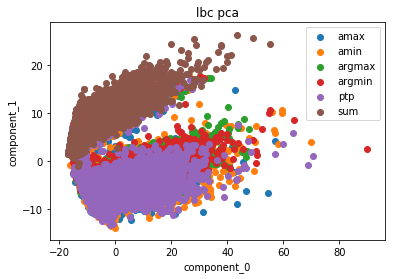

In [220]:
data='/Users/sofiadunlosky/Documents/models/CW/experiments/pca_symbolic/transformed data/'
a=np.load(data+'data_lbc.npy')
a1=np.load(data+'label_lbc.npy')
plot_pca_data(a,a1,'lbc',3000)

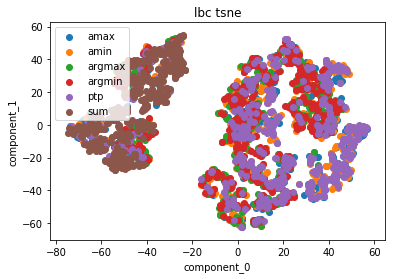

In [225]:
plot_tsne_data(a,a1,'lbc',500)

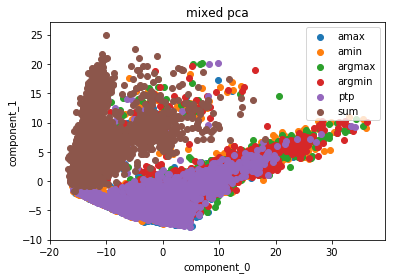

In [227]:
data='/Users/sofiadunlosky/Documents/models/CW/experiments/pca_symbolic/transformed data/'
a=np.load(data+'data_mixed.npy')
a1=np.load(data+'label_mixed.npy')
plot_pca_data(a,a1,'mixed',3000)

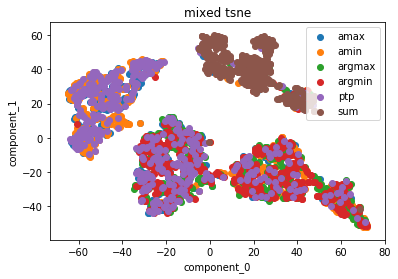

In [228]:
plot_tsne_data(a,a1,'mixed',500)

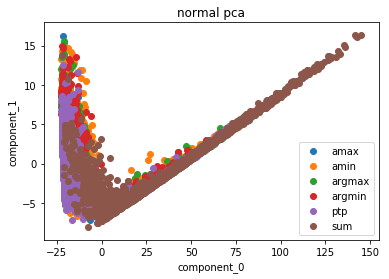

In [229]:
data='/Users/sofiadunlosky/Documents/models/CW/experiments/pca_symbolic/transformed data/'
a=np.load(data+'data_normal.npy')
a1=np.load(data+'label_normal.npy')
plot_pca_data(a,a1,'normal')

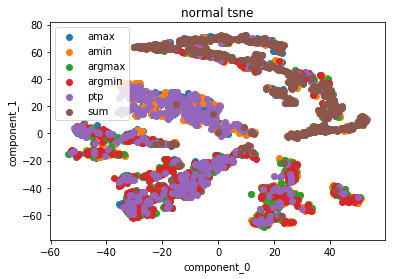

In [230]:
plot_tsne_data(a,a1,'normal',500)